In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Aug 23 09:36:15 2024

@author: au605715
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Load the DataFrame
df_base = pd.read_csv(r'../results/processed_data/2_lmem_results/combined_results_base2.csv')
df_base.drop(columns=['StdErr', 'z', 'P'], axis=1, inplace=True)

# Load the DataFrame
df_tl = pd.read_csv(r'../results/processed_data/2_lmem_results/combined_results_tl2.csv')
df_tl.drop(columns=['StdErr', 'z', 'P'], axis=1, inplace=True)

# Load the DataFrame
df_single = pd.read_csv(r'../results/processed_data/2_lmem_results/combined_results_single2.csv')
df_single.drop(columns=['StdErr', 'z', 'P'], axis=1, inplace=True)


In [3]:
df_single

,Contrast,Estimate,X2.5.,X97.5.
0,w_0,2.534888,2.413451,2.656326
1,w_10,2.536743,2.416896,2.656589
2,w_20,2.538597,2.420003,2.657192
3,w_30,2.540452,2.422760,2.658143
4,w_40,2.542306,2.425160,2.659453
5,w_50,2.544161,2.427196,2.661125
6,w_60,2.546015,2.428869,2.663162
7,w_70,2.547870,2.430178,2.665561
8,w_80,2.549724,2.431130,2.668318
9,w_90,2.551578,2.431732,2.671425


In [4]:

# Split the 'Contrast' column into two separate columns


def extract_group(df, group):
    df[['Group', 'Ratio10']] = df['Contrast'].str.rsplit('_', n=1, expand=True)
    df_group = df[df['Group']== group]
    
    return df_group




#naive approach
y_value_gr1 = 2.445957494358572#  [1.90 - 2.32]
y_value_gr1_ci25  = 2.320706511978497
y_value_gr1_ci975 = 2.5712084767386467

y_value_gr2 = 2.40964479556775# [2.12 - 2.56]
y_value_gr2_ci25  = 2.284393813187675 
y_value_gr2_ci975 = 2.534895777947825 

y_value_single_gr1 = 2.536772767707459
y_value_single_gr1_ci25 = 2.3765404236675534
y_value_single_gr1_ci975 = 2.6970051117473646
y_value_single_gr2 = 2.6342507657246292 
y_value_single_gr2_ci25 = 2.4740184216847236
y_value_single_gr2_ci975 = 2.794483109764535



df_base_gr1 = extract_group(df_base, group="w")
df_base_gr2 = extract_group(df_base, group="b")
df_tl_gr1 = extract_group(df_tl, group="w")
df_tl_gr2 = extract_group(df_tl, group="b")
df_single_gr1 = extract_group(df_single, group="w")
df_single_gr2 = extract_group(df_single, group="b")
group1 = "White"
group2 = "Black"

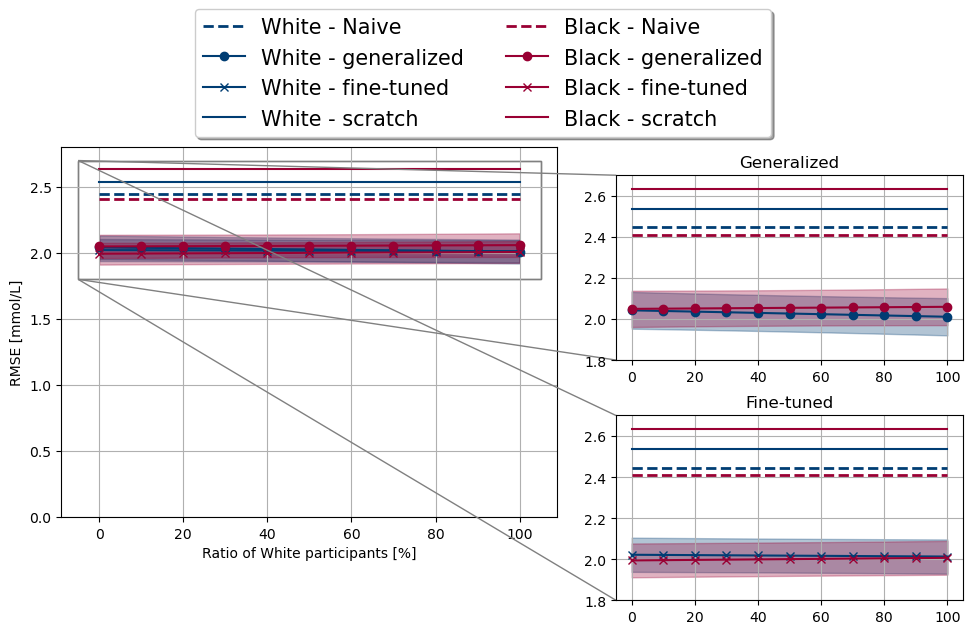

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

gr1_color = "#003d73"
gr2_color = "#990033"
marker1 = "o"
marker2 = "^"
marker3 = "x"

x = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


# Plot the predictions
fig, ax_lmem = plt.subplots()


# naive
line_naive_gr1, = plt.plot([0, 100], [y_value_gr1, y_value_gr1], color=gr1_color, linestyle='--', linewidth=2, label = f'{group1} - Naive')#, label=f'Group 1 - naive ({round(y_value_gr1, 2)})')
# plt.fill_between(x,y_value_gr1_ci25,y_value_gr1_ci975, color=gr1_color, alpha=0.3)

line_base_gr1 = plt.plot(x, df_base_gr1['Estimate'], marker=marker1, linestyle='-', color = gr1_color, label =  f'{group1} - generalized')
plt.fill_between(x,df_base_gr1['X2.5.'],df_base_gr1['X97.5.'], color=gr1_color, alpha=0.3)

line_tl_gr1 =plt.plot(x, df_tl_gr1['Estimate'], marker=marker3, linestyle='-', color = gr1_color, label = f'{group1} - fine-tuned')
plt.fill_between(x,df_tl_gr1['X2.5.'],df_tl_gr1['X97.5.'], color=gr1_color, alpha=0.3)

line_single_gr1 = plt.plot([0, 100], [y_value_single_gr1, y_value_single_gr1], linestyle='-', color = gr1_color, label = f'{group1} - scratch')
# plt.fill_between(x,df_single_gr1['X2.5.'],df_single_gr1['X97.5.'], color=gr1_color, alpha=0.3)

################

line_naive_gr2, = plt.plot([0, 100], [y_value_gr2, y_value_gr2], color=gr2_color, linestyle='--', linewidth=2, label = f'{group2} - Naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')
# plt.fill_between(x,y_value_gr2_ci25,y_value_gr2_ci975, color=gr2_color, alpha=0.3)

line_base_gr2 = plt.plot(x, df_base_gr2['Estimate'], marker=marker1, linestyle='-', color = gr2_color,label = f'{group2} - generalized' )
plt.fill_between(x,df_base_gr2['X2.5.'],df_base_gr2['X97.5.'] , color=gr2_color, alpha=0.3)

line_tl_gr2 = plt.plot(x, df_tl_gr2['Estimate'], marker=marker3, linestyle='-', color = gr2_color,label = f'{group2} - fine-tuned' )
plt.fill_between(x,df_tl_gr2['X2.5.'],df_tl_gr2['X97.5.'], color=gr2_color, alpha=0.3)

line_single_gr2 = plt.plot([0, 100], [y_value_single_gr2, y_value_single_gr2], linestyle='-', color = gr2_color,label = f'{group2} - scratch' )
# plt.fill_between(x,df_single_gr2['X2.5.'],df_single_gr2['X97.5.'], color=gr2_color, alpha=0.3)





plt.ylim(0, 2.8)
plt.xlim(-9, 109)


# Add the main legend
handles, labels = ax_lmem.get_legend_handles_labels()
ax_lmem.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.85, 1), ncol=2, fancybox=True, shadow=True, fontsize=15)


# ################## Generalized
ax_inset1 = inset_axes(ax_lmem, width="70%", height="50%",
                       bbox_to_anchor=(0.65, 0.65, 1, 1),
                       bbox_transform=ax_lmem.transAxes,
                       loc='lower right', borderpad=-6 )

ax_inset1.plot([0, 100], [y_value_gr1, y_value_gr1], color=gr1_color, linestyle='--', linewidth=2, label = f'{group1} - Naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')
ax_inset1.plot([0, 100], [y_value_gr2, y_value_gr2], color=gr2_color, linestyle='--', linewidth=2, label = f'{group2} - Naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')

ax_inset1.plot(x, df_base_gr1['Estimate'], marker=marker1, linestyle='-', color = gr1_color, label = 'White_male_adult - generalized')
ax_inset1.fill_between(x,df_base_gr1['X2.5.'],df_base_gr1['X97.5.'], color=gr1_color, alpha=0.3)

ax_inset1.plot(x, df_base_gr2['Estimate'], marker=marker1, linestyle='-', color = gr2_color,label = 'Black_male_adult - generalized' )
ax_inset1.fill_between(x,df_base_gr2['X2.5.'],df_base_gr2['X97.5.'], color=gr2_color, alpha=0.3)

ax_inset1.plot([0, 100], [y_value_single_gr1, y_value_single_gr1], linestyle='-', color = gr1_color, label = f'{group1} - scratch')
ax_inset1.plot([0, 100], [y_value_single_gr2, y_value_single_gr2], linestyle='-', color = gr2_color,label = f'{group2} - scratch' )

# Set the zoomed-in region
ax_inset1.set_xlim(-5, 105)
ax_inset1.set_ylim(1.8, 2.7)
ax_inset1.set_title("Generalized")
ax_inset1.grid(True)


########### Transfer learned
ax_inset2 = inset_axes(ax_lmem, width="70%", height="50%",
                       bbox_to_anchor=(0.65, 0, 1, 1),
                       bbox_transform=ax_lmem.transAxes,
                       loc='lower right', borderpad=-6 )

ax_inset2.plot([0, 100], [y_value_gr1, y_value_gr1], color=gr1_color, linestyle='--', linewidth=2, label = f'{group1} - Naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')
ax_inset2.plot([0, 100], [y_value_gr2, y_value_gr2], color=gr2_color, linestyle='--', linewidth=2, label = f'{group2} - Naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')

ax_inset2.plot(x, df_tl_gr1['Estimate'], marker=marker3, linestyle='-', color = gr1_color, label = 'White_male_adult - fine-tuned')
ax_inset2.fill_between(x, df_tl_gr1['X2.5.'], df_tl_gr1['X97.5.'], color=gr1_color, alpha=0.3)

ax_inset2.plot(x, df_tl_gr2['Estimate'], marker=marker3, linestyle='-', color = gr2_color,label = 'Black_male_adult - fine-tuned' )
ax_inset2.fill_between(x,df_tl_gr2['X2.5.'],df_tl_gr2['X97.5.'], color=gr2_color, alpha=0.3)

ax_inset2.plot([0, 100], [y_value_single_gr1, y_value_single_gr1], linestyle='-', color = gr1_color, label = f'{group1} - scratch')
ax_inset2.plot([0, 100], [y_value_single_gr2, y_value_single_gr2], linestyle='-', color = gr2_color,label = f'{group2} - scratch' )
# Set the zoomed-in region
ax_inset2.set_xlim(-5, 105)
ax_inset2.set_ylim(1.8, 2.7)
ax_inset2.set_title("Fine-tuned")
ax_inset2.grid(True)

# Mark the inset region on the main plot
mark_inset(ax_lmem, ax_inset1, loc1=2, loc2=3, fc="none", ec="0.5")
mark_inset(ax_lmem, ax_inset2, loc1=2, loc2=3, fc="none", ec="0.5")
ax_lmem.set_xlabel('Ratio of White participants [%]')
ax_lmem.set_ylabel('RMSE [mmol/L]')
ax_lmem.grid(True)

# plt.show()
# fig.savefig(f'../results/processed_data/2_lmem_results/2_lmem_plot.png', dpi=600, format='png',  bbox_inches='tight')  # Save as high-resolution PNG file


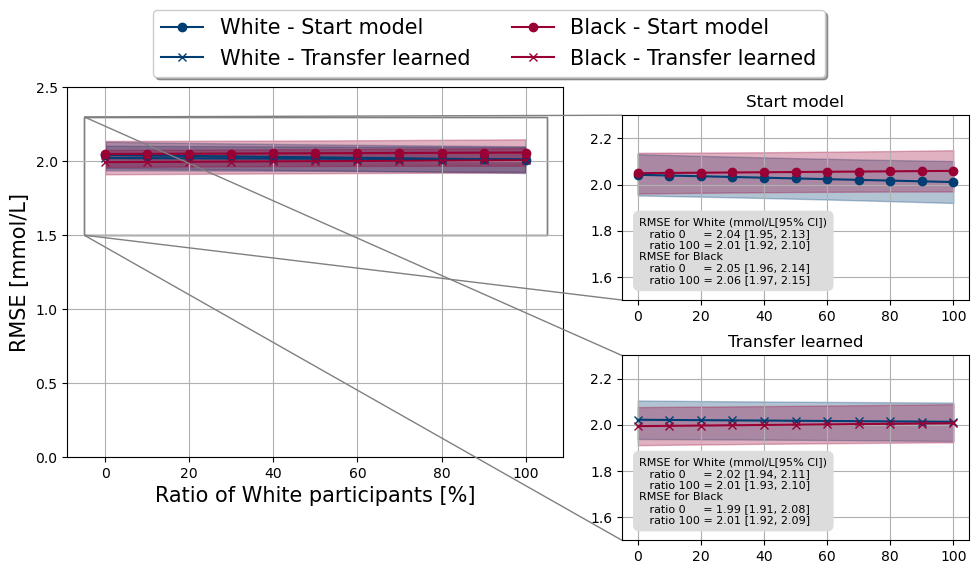

In [6]:
# For ATTD

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

gr1_color = "#003d73"
gr2_color = "#990033"
marker1 = "o"
marker2 = "^"
marker3 = "x"

x = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


# Plot the predictions
fig, ax_lmem = plt.subplots()


# naive
# line_naive_gr1, = plt.plot([0, 100], [y_value_gr1, y_value_gr1], color=gr1_color, linestyle='--', linewidth=2, label = f'{group1} - Naive')#, label=f'Group 1 - naive ({round(y_value_gr1, 2)})')
# plt.fill_between(x,y_value_gr1_ci25,y_value_gr1_ci975, color=gr1_color, alpha=0.3)

line_base_gr1 = plt.plot(x, df_base_gr1['Estimate'], marker=marker1, linestyle='-', color = gr1_color, label =  f'{group1} - Start model')
plt.fill_between(x,df_base_gr1['X2.5.'],df_base_gr1['X97.5.'], color=gr1_color, alpha=0.3)

line_tl_gr1 =plt.plot(x, df_tl_gr1['Estimate'], marker=marker3, linestyle='-', color = gr1_color, label = f'{group1} - Transfer learned')
plt.fill_between(x,df_tl_gr1['X2.5.'],df_tl_gr1['X97.5.'], color=gr1_color, alpha=0.3)

# line_single_gr1 = plt.plot([0, 100], [y_value_single_gr1, y_value_single_gr1], linestyle='-', color = gr1_color, label = f'{group1} - scratch')
# plt.fill_between(x,df_single_gr1['X2.5.'],df_single_gr1['X97.5.'], color=gr1_color, alpha=0.3)

################

# line_naive_gr2, = plt.plot([0, 100], [y_value_gr2, y_value_gr2], color=gr2_color, linestyle='--', linewidth=2, label = f'{group2} - Naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')
# plt.fill_between(x,y_value_gr2_ci25,y_value_gr2_ci975, color=gr2_color, alpha=0.3)

line_base_gr2 = plt.plot(x, df_base_gr2['Estimate'], marker=marker1, linestyle='-', color = gr2_color,label = f'{group2} - Start model' )
plt.fill_between(x,df_base_gr2['X2.5.'],df_base_gr2['X97.5.'] , color=gr2_color, alpha=0.3)

line_tl_gr2 = plt.plot(x, df_tl_gr2['Estimate'], marker=marker3, linestyle='-', color = gr2_color,label = f'{group2} - Transfer learned' )
plt.fill_between(x,df_tl_gr2['X2.5.'],df_tl_gr2['X97.5.'], color=gr2_color, alpha=0.3)

# line_single_gr2 = plt.plot([0, 100], [y_value_single_gr2, y_value_single_gr2], linestyle='-', color = gr2_color,label = f'{group2} - scratch' )
# plt.fill_between(x,df_single_gr2['X2.5.'],df_single_gr2['X97.5.'], color=gr2_color, alpha=0.3)

plt.ylim(0, 2.5)
plt.xlim(-9, 109)

# Add the main legend
handles, labels = ax_lmem.get_legend_handles_labels()
ax_lmem.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.85, 1), ncol=2, fancybox=True, shadow=True, fontsize=15)


# ################## Generalized
ax_inset1 = inset_axes(ax_lmem, width="70%", height="50%",
                       bbox_to_anchor=(0.65, 0.65, 1, 1),
                       bbox_transform=ax_lmem.transAxes,
                       loc='lower right', borderpad=-6 )

# ax_inset1.plot([0, 100], [y_value_gr1, y_value_gr1], color=gr1_color, linestyle='--', linewidth=2, label = f'{group1} - Naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')
# ax_inset1.plot([0, 100], [y_value_gr2, y_value_gr2], color=gr2_color, linestyle='--', linewidth=2, label = f'{group2} - Naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')

ax_inset1.plot(x, df_base_gr1['Estimate'], marker=marker1, linestyle='-', color = gr1_color, label = 'White - generalized')
ax_inset1.fill_between(x,df_base_gr1['X2.5.'],df_base_gr1['X97.5.'], color=gr1_color, alpha=0.3)

ax_inset1.plot(x, df_base_gr2['Estimate'], marker=marker1, linestyle='-', color = gr2_color,label = 'Black - generalized' )
ax_inset1.fill_between(x,df_base_gr2['X2.5.'],df_base_gr2['X97.5.'], color=gr2_color, alpha=0.3)

# ax_inset1.plot([0, 100], [y_value_single_gr1, y_value_single_gr1], linestyle='-', color = gr1_color, label = f'{group1} - scratch')
# ax_inset1.plot([0, 100], [y_value_single_gr2, y_value_single_gr2], linestyle='-', color = gr2_color,label = f'{group2} - scratch' )

# Set the zoomed-in region
ax_inset1.set_xlim(-5, 105)
ax_inset1.set_ylim(1.5, 2.3)
ax_inset1.set_title("Start model")
ax_inset1.grid(True)


########### Transfer learned
ax_inset2 = inset_axes(ax_lmem, width="70%", height="50%",
                       bbox_to_anchor=(0.65, 0, 1, 1),
                       bbox_transform=ax_lmem.transAxes,
                       loc='lower right', borderpad=-6 )

# ax_inset2.plot([0, 100], [y_value_gr1, y_value_gr1], color=gr1_color, linestyle='--', linewidth=2, label = f'{group1} - Naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')
# ax_inset2.plot([0, 100], [y_value_gr2, y_value_gr2], color=gr2_color, linestyle='--', linewidth=2, label = f'{group2} - Naive')# , label=f'Group 2 - naive ({round(y_value_gr2, 2)})')

ax_inset2.plot(x, df_tl_gr1['Estimate'], marker=marker3, linestyle='-', color = gr1_color, label = 'White_male_adult - fine-tuned')
ax_inset2.fill_between(x, df_tl_gr1['X2.5.'], df_tl_gr1['X97.5.'], color=gr1_color, alpha=0.3)

ax_inset2.plot(x, df_tl_gr2['Estimate'], marker=marker3, linestyle='-', color = gr2_color,label = 'Black_male_adult - fine-tuned' )
ax_inset2.fill_between(x,df_tl_gr2['X2.5.'],df_tl_gr2['X97.5.'], color=gr2_color, alpha=0.3)

# ax_inset2.plot([0, 100], [y_value_single_gr1, y_value_single_gr1], linestyle='-', color = gr1_color, label = f'{group1} - scratch')
# ax_inset2.plot([0, 100], [y_value_single_gr2, y_value_single_gr2], linestyle='-', color = gr2_color,label = f'{group2} - scratch' )
# Set the zoomed-in region
ax_inset2.set_xlim(-5, 105)
ax_inset2.set_ylim(1.5, 2.3)
ax_inset2.set_title("Transfer learned")
ax_inset2.grid(True)

# Mark the inset region on the main plot
mark_inset(ax_lmem, ax_inset1, loc1=2, loc2=3, fc="none", ec="0.5")
mark_inset(ax_lmem, ax_inset2, loc1=2, loc2=3, fc="none", ec="0.5")
ax_lmem.set_xlabel('Ratio of White participants [%]', fontsize=15)
ax_lmem.set_ylabel('RMSE [mmol/L]', fontsize=15)
ax_lmem.grid(True)



# Add text to the first inset
ax_inset1.text(0.05, 0.45,'RMSE for White (mmol/L[95% CI])\n   ratio 0     = 2.04 [1.95, 2.13]\n   ratio 100 = 2.01 [1.92, 2.10] \nRMSE for Black \n   ratio 0     = 2.05 [1.96, 2.14]\n   ratio 100 = 2.06 [1.97, 2.15]', 
               transform=ax_inset1.transAxes, fontsize=8, verticalalignment='top', 
               bbox=dict(facecolor='gainsboro', alpha=1, edgecolor='gainsboro', boxstyle='round,pad=0.5'))

# Add text to the second inset
ax_inset2.text(0.05, 0.45,'RMSE for White (mmol/L[95% CI])\n   ratio 0     = 2.02 [1.94, 2.11]\n   ratio 100 = 2.01 [1.93, 2.10] \nRMSE for Black \n   ratio 0     = 1.99 [1.91, 2.08] \n   ratio 100 = 2.01 [1.92, 2.09] ', 
               transform=ax_inset2.transAxes, fontsize=8, verticalalignment='top', 
               bbox=dict(facecolor='gainsboro', alpha=1, edgecolor='gainsboro', boxstyle='round,pad=0.5'))

plt.show()
# Set the figure size to match the maximum pixel size
fig.set_size_inches(600/100, 800/100)  # Convert pixels to inches by dividing by dpi

# Save the figure with a lower dpi to reduce file size
fig.savefig(f'../results/processed_data/2_lmem_results/2_lmem_plot_ATTD.png', dpi=100, format='png', bbox_inches='tight')
# fig.savefig(f'../results/processed_data/2_lmem_results/2_lmem_plot.png', dpi=600, format='png',  bbox_inches='tight')  # Save as high-resolution PNG file

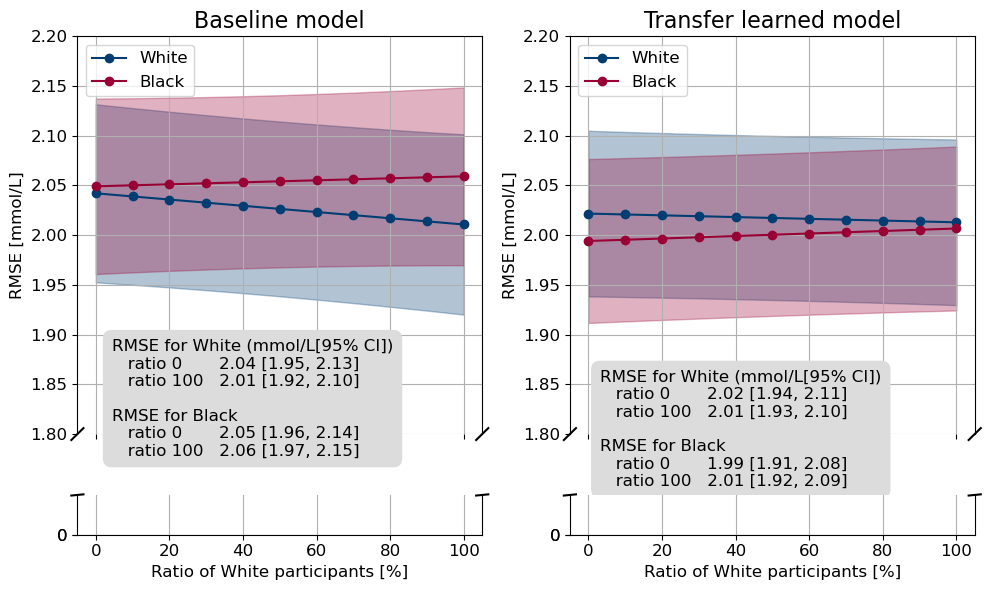

In [7]:
import matplotlib.pyplot as plt
import numpy as np

myFontsize = 12

# Create a figure with two columns of subplots, each with two stacked subplots for broken y-axis
fig, ((ax1_top, ax2_top), (ax1_bottom, ax2_bottom)) = plt.subplots(2, 2, 
                                                                   sharex='col', figsize=(10,6), 
                                                                   gridspec_kw={'height_ratios': [10, 1]})


# --- First plot (left) ---
# Top subplot for broken y-axis (higher range)
ax1_top.plot(x, df_base_gr1['Estimate'], marker=marker1, linestyle='-', color = gr1_color, label = 'White')
ax1_top.fill_between(x,df_base_gr1['X2.5.'],df_base_gr1['X97.5.'], color=gr1_color, alpha=0.3)
ax1_top.plot(x, df_base_gr2['Estimate'], marker=marker1, linestyle='-', color = gr2_color,label = 'Black' )
ax1_top.fill_between(x,df_base_gr2['X2.5.'],df_base_gr2['X97.5.'], color=gr2_color, alpha=0.3)

ax1_top.legend(loc='upper left', fontsize = myFontsize)

ax1_top.set_ylim(1.8, 2.2)  # Set higher y-limits
ax1_top.spines['bottom'].set_visible(False)
ax1_top.tick_params(labelbottom=False)  # Hide x-axis labels on the top subplot

# Bottom subplot for broken y-axis (lower range)
ax1_bottom.set_ylim(0, 0.5)  # Set lower y-limits
ax1_bottom.spines['top'].set_visible(False)

# --- Second plot (right) ---
# Top subplot for broken y-axis (higher range)
ax2_top.plot(x, df_tl_gr1['Estimate'], marker=marker1, linestyle='-', color = gr1_color, label = 'White')
ax2_top.fill_between(x, df_tl_gr1['X2.5.'], df_tl_gr1['X97.5.'], color=gr1_color, alpha=0.3)
ax2_top.plot(x, df_tl_gr2['Estimate'], marker=marker1, linestyle='-', color = gr2_color,label = 'Black' )
ax2_top.fill_between(x,df_tl_gr2['X2.5.'],df_tl_gr2['X97.5.'], color=gr2_color, alpha=0.3)

ax2_top.legend(loc='upper left', fontsize = myFontsize)

ax2_top.set_ylim(1.8, 2.2)  # Set higher y-limits for second plot
ax2_top.spines['bottom'].set_visible(False)
ax2_top.tick_params(labelbottom=False)

# Bottom subplot for broken y-axis (lower range)
ax2_bottom.set_ylim(0, 0.5)  # Set lower y-limits
ax2_bottom.spines['top'].set_visible(False)


# --- Adding break markers (diagonal lines) for both subplots ---
d = .015  # size of the diagonal break markers in axes coordinates

# Break markers for first subplot (left)
kwargs = dict(transform=ax1_top.transAxes, color='k', clip_on=False)
ax1_top.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
ax1_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax1_bottom.transAxes)
ax1_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax1_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Break markers for second subplot (right)
kwargs = dict(transform=ax2_top.transAxes, color='k', clip_on=False)
ax2_top.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
ax2_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2_bottom.transAxes)
ax2_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


# # Add text to the first inset
ax1_top.text(-1.5, -0.5,'RMSE for White (mmol/L[95% CI])\n   ratio 0       2.04 [1.95, 2.13]\n   ratio 100   2.01 [1.92, 2.10] \n\nRMSE for Black \n   ratio 0       2.05 [1.96, 2.14]\n   ratio 100   2.06 [1.97, 2.15]', 
               transform=ax_inset1.transAxes, fontsize=12, verticalalignment='top', 
               bbox=dict(facecolor='gainsboro', alpha=1, edgecolor='gainsboro', boxstyle='round,pad=0.5'))
      
# Add text to the second inset
# ax2_top.text(0.015, 0.8,'RMSE for White (mmol/L[95% CI])\n   Naive              2.45 [2.32 - 2.57]\n   Individualized 2.54 [2.38 - 2.70]\n   ratio 0             2.02 [1.94, 2.11]\n   ratio 100         2.01 [1.93, 2.10] \n\nRMSE for Black \n   ratio 0             1.99 [1.91, 2.08] \n   ratio 100         2.01 [1.92, 2.09] ', 
ax2_top.text(0, 0.7,'RMSE for White (mmol/L[95% CI])\n   ratio 0       2.02 [1.94, 2.11]\n   ratio 100   2.01 [1.93, 2.10] \n\nRMSE for Black \n   ratio 0       1.99 [1.91, 2.08] \n   ratio 100   2.01 [1.92, 2.09] ', 
               transform=ax_inset2.transAxes, fontsize=12, verticalalignment='top', 
         bbox=dict(facecolor='gainsboro', alpha=1, edgecolor='gainsboro', boxstyle='round,pad=0.5'))


ax1_top.set_title("Baseline model", fontsize=myFontsize+4)
ax1_top.grid(True)
ax1_bottom.grid(True)

ax2_top.set_title("Transfer learned model", fontsize=myFontsize+4)
ax2_top.grid(True)
ax2_bottom.grid(True)

ax1_bottom.set_xlabel('Ratio of White participants [%]', fontsize=myFontsize)
ax1_top.set_ylabel('RMSE [mmol/L]', fontsize=myFontsize)
ax2_bottom.set_xlabel('Ratio of White participants [%]', fontsize=myFontsize)
ax2_top.set_ylabel('RMSE [mmol/L]', fontsize=myFontsize)

ax1_bottom.set_yticks([0, 0])  # Remove the 0.5 tick
ax2_bottom.set_yticks([0, 0])  # Remove the 0.5 tick
ax1_top.tick_params(labelsize=myFontsize)  # Increase tick label size
ax2_top.tick_params(labelsize=myFontsize)  # Increase tick label size
ax1_bottom.tick_params(labelsize=myFontsize)  # Increase tick label size
ax2_bottom.tick_params(labelsize=myFontsize)  # Increase tick label size

plt.tight_layout()
plt.show()

# fig.set_size_inches(600/100, 800/100)  # Convert pixels to inches by dividing by dpi

# Save the figure with a lower dpi to reduce file size
# fig.savefig(f'../results/processed_data/2_lmem_results/2_lmem_plot_ATTD_v2.png', dpi=100, format='png', bbox_inches='tight')

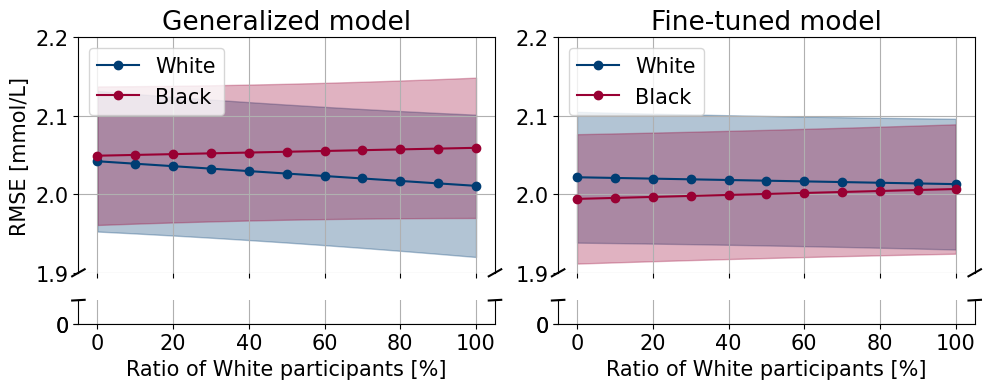

In [12]:
import matplotlib.pyplot as plt
import numpy as np

myFontsize = 15

# Create a figure with two columns of subplots, each with two stacked subplots for broken y-axis
fig, ((ax1_top, ax2_top), (ax1_bottom, ax2_bottom)) = plt.subplots(2, 2, 
                                                                   sharex='col', figsize=(10,4), 
                                                                   gridspec_kw={'height_ratios': [10, 1]})


# --- First plot (left) ---
# Top subplot for broken y-axis (higher range)
ax1_top.plot(x, df_base_gr1['Estimate'], marker=marker1, linestyle='-', color = gr1_color, label = 'White')
ax1_top.fill_between(x,df_base_gr1['X2.5.'],df_base_gr1['X97.5.'], color=gr1_color, alpha=0.3)
ax1_top.plot(x, df_base_gr2['Estimate'], marker=marker1, linestyle='-', color = gr2_color,label = 'Black' )
ax1_top.fill_between(x,df_base_gr2['X2.5.'],df_base_gr2['X97.5.'], color=gr2_color, alpha=0.3)

ax1_top.legend(loc='upper left', fontsize = myFontsize)

ax1_top.set_ylim(1.9, 2.2)  # Set higher y-limits
ax1_top.spines['bottom'].set_visible(False)
ax1_top.tick_params(labelbottom=False)  # Hide x-axis labels on the top subplot

# Bottom subplot for broken y-axis (lower range)
ax1_bottom.set_ylim(0, 0.5)  # Set lower y-limits
ax1_bottom.spines['top'].set_visible(False)

# --- Second plot (right) ---
# Top subplot for broken y-axis (higher range)
ax2_top.plot(x, df_tl_gr1['Estimate'], marker=marker1, linestyle='-', color = gr1_color, label = 'White')
ax2_top.fill_between(x, df_tl_gr1['X2.5.'], df_tl_gr1['X97.5.'], color=gr1_color, alpha=0.3)
ax2_top.plot(x, df_tl_gr2['Estimate'], marker=marker1, linestyle='-', color = gr2_color,label = 'Black' )
ax2_top.fill_between(x,df_tl_gr2['X2.5.'],df_tl_gr2['X97.5.'], color=gr2_color, alpha=0.3)

ax2_top.legend(loc='upper left', fontsize = myFontsize)

ax2_top.set_ylim(1.9, 2.2)  # Set higher y-limits for second plot
ax2_top.spines['bottom'].set_visible(False)
ax2_top.tick_params(labelbottom=False)

# Bottom subplot for broken y-axis (lower range)
ax2_bottom.set_ylim(0, 0.5)  # Set lower y-limits
ax2_bottom.spines['top'].set_visible(False)


# --- Adding break markers (diagonal lines) for both subplots ---
d = .015  # size of the diagonal break markers in axes coordinates

# Break markers for first subplot (left)
kwargs = dict(transform=ax1_top.transAxes, color='k', clip_on=False)
ax1_top.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
ax1_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax1_bottom.transAxes)
ax1_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax1_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Break markers for second subplot (right)
kwargs = dict(transform=ax2_top.transAxes, color='k', clip_on=False)
ax2_top.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal
ax2_top.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2_bottom.transAxes)
ax2_bottom.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2_bottom.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


# # Add text to the first inset
# ax1_top.text(-1.5, -0.5,'RMSE for White (mmol/L[95% CI])\n   ratio 0       2.04 [1.95, 2.13]\n   ratio 100   2.01 [1.92, 2.10] \n\nRMSE for Black \n   ratio 0       2.05 [1.96, 2.14]\n   ratio 100   2.06 [1.97, 2.15]', 
#                transform=ax_inset1.transAxes, fontsize=12, verticalalignment='top', 
#                bbox=dict(facecolor='gainsboro', alpha=1, edgecolor='gainsboro', boxstyle='round,pad=0.5'))
      
# Add text to the second inset
# ax2_top.text(0.015, 0.8,'RMSE for White (mmol/L[95% CI])\n   Naive              2.45 [2.32 - 2.57]\n   Individualized 2.54 [2.38 - 2.70]\n   ratio 0             2.02 [1.94, 2.11]\n   ratio 100         2.01 [1.93, 2.10] \n\nRMSE for Black \n   ratio 0             1.99 [1.91, 2.08] \n   ratio 100         2.01 [1.92, 2.09] ', 
# # ax2_top.text(0, 0.7,'RMSE for White (mmol/L[95% CI])\n   ratio 0       2.02 [1.94, 2.11]\n   ratio 100   2.01 [1.93, 2.10] \n\nRMSE for Black \n   ratio 0       1.99 [1.91, 2.08] \n   ratio 100   2.01 [1.92, 2.09] ', 
#                transform=ax_inset2.transAxes, fontsize=12, verticalalignment='top', 
#          bbox=dict(facecolor='gainsboro', alpha=1, edgecolor='gainsboro', boxstyle='round,pad=0.5'))


ax1_top.set_title("Generalized model", fontsize=myFontsize+4)
ax1_top.grid(True)
ax1_bottom.grid(True)

ax2_top.set_title("Fine-tuned model", fontsize=myFontsize+4)
ax2_top.grid(True)
ax2_bottom.grid(True)

ax1_bottom.set_xlabel('Ratio of White participants [%]', fontsize=myFontsize)
ax1_top.set_ylabel('RMSE [mmol/L]', fontsize=myFontsize)
ax2_bottom.set_xlabel('Ratio of White participants [%]', fontsize=myFontsize)
# ax2_top.set_ylabel('RMSE [mmol/L]', fontsize=myFontsize)

ax1_bottom.set_yticks([0, 0])  # Remove the 0.5 tick
ax2_bottom.set_yticks([0, 0])  # Remove the 0.5 tick
ax1_top.tick_params(labelsize=myFontsize)  # Increase tick label size
ax2_top.tick_params(labelsize=myFontsize)  # Increase tick label size
ax1_bottom.tick_params(labelsize=myFontsize)  # Increase tick label size
ax2_bottom.tick_params(labelsize=myFontsize)  # Increase tick label size

plt.tight_layout()
plt.show()

# fig.set_size_inches(600/100, 800/100)  # Convert pixels to inches by dividing by dpi

# Save the figure with a lower dpi to reduce file size
fig.savefig(f'../results/processed_data/2_lmem_results/2_lmem_plot_v4.pdf', dpi=100, format='pdf', bbox_inches='tight')